In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\Machine learning\Workbook\Naive Bayes\Shopping.csv')
df.head()

,Day,Discount,Free Delivery,Purchase
0,Weekday,Yes,Yes,Yes
1,Weekday,Yes,Yes,Yes
2,Weekday,No,No,No
3,Holiday,Yes,Yes,Yes
4,Weekend,Yes,Yes,Yes


In [3]:
df.columns

Index(['Day', 'Discount', 'Free Delivery', 'Purchase'], dtype='object')

In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()

cols = [['Day', 'Discount', 'Free Delivery']]
for col in cols:
    df[col] = df[col].apply(label_encoder.fit_transform)

In [5]:
df.head()

,Day,Discount,Free Delivery,Purchase
0,1,1,1,Yes
1,1,1,1,Yes
2,1,0,0,No
3,0,1,1,Yes
4,2,1,1,Yes


In [6]:
df.shape

(30, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Day            30 non-null     int64 
 1   Discount       30 non-null     int64 
 2   Free Delivery  30 non-null     int64 
 3   Purchase       30 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,30.0,0.900000,0.803012,0.0,0.0,1.0,1.75,2.0
Discount,30.0,0.666667,0.479463,0.0,0.0,1.0,1.00,1.0
Free Delivery,30.0,0.766667,0.430183,0.0,1.0,1.0,1.00,1.0


In [8]:
df.isnull().sum()

Day              0
Discount         0
Free Delivery    0
Purchase         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(18)

In [ ]:
cols = [['Day', 'Discount', 'Free Delivery']]

Day


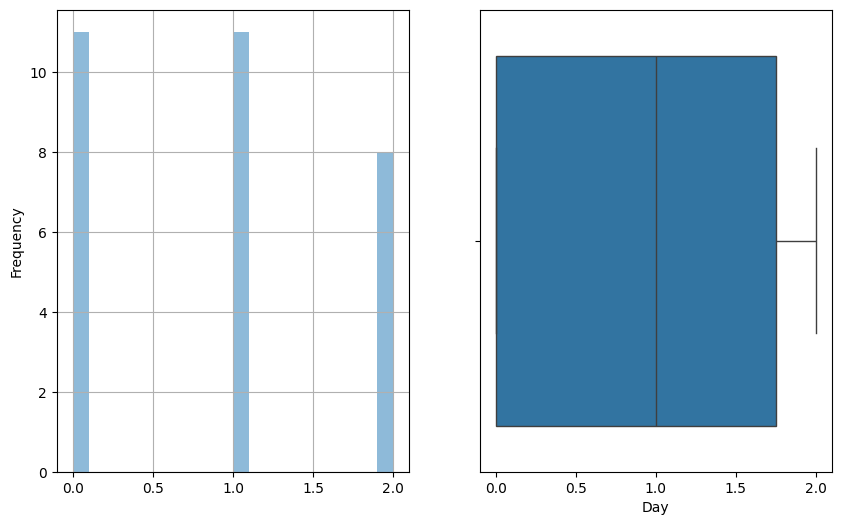

Discount


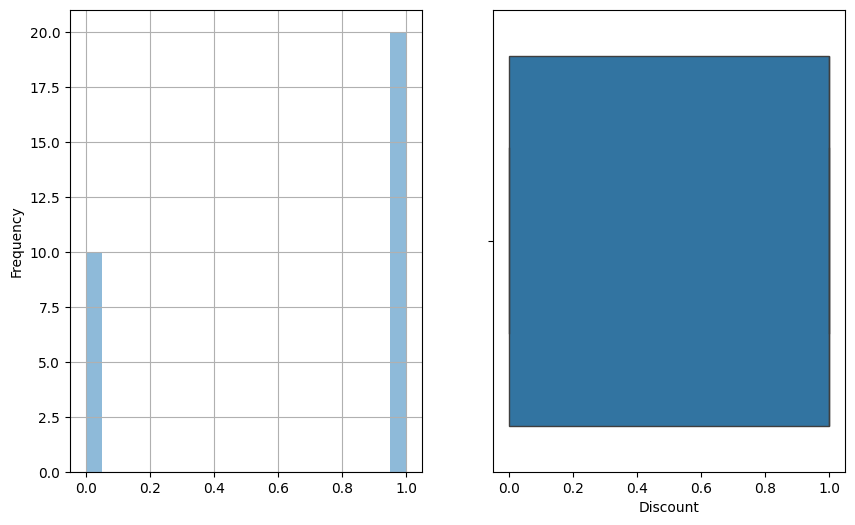

Free Delivery


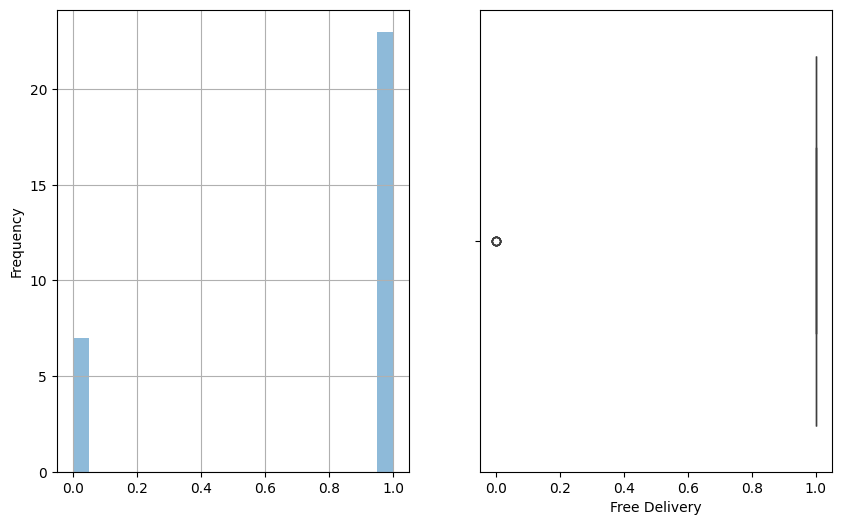

Purchase


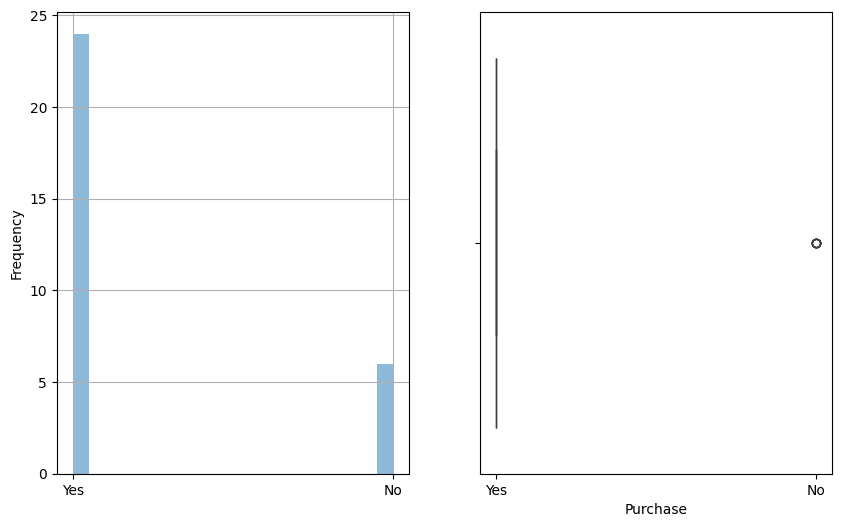

In [10]:
for col in df.columns:
    print(col)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=20,alpha=0.5)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [11]:
df.columns

Index(['Day', 'Discount', 'Free Delivery', 'Purchase'], dtype='object')

In [12]:
X = df.drop(columns=['Purchase'],axis=1)
y = df['Purchase']

In [17]:
print(X.head())

   Day  Discount  Free Delivery
0    1         1              1
1    1         1              1
2    1         0              0
3    0         1              1
4    2         1              1


In [13]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, train_size = 0.6, random_state = 42)

In [14]:
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(x_train, y_train)
nb_classifier

GaussianNB()

In [15]:
x_test

,Day,Discount,Free Delivery
27,1,1,1
15,1,1,1
23,1,1,1
17,1,1,0
8,2,1,1
9,0,1,1
28,0,1,1
24,0,0,0
12,2,1,1
0,1,1,1


In [16]:
y_test

27    Yes
15    Yes
23    Yes
17    Yes
8     Yes
9     Yes
28    Yes
24     No
12    Yes
0     Yes
4     Yes
16    Yes
Name: Purchase, dtype: object

In [17]:
# Make predictions
y_pred = nb_classifier.predict(x_test)
y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes'], dtype='<U3')

In [18]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f} %")

Accuracy: 100.00 %


In [25]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00        11

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [30]:
X.head()

,Day,Discount,Free Delivery
0,1,1,1
1,1,1,1
2,1,0,0
3,0,1,1
4,2,1,1


In [20]:
new = [[0, 1, 1]]
y_pred = nb_classifier.predict(new)
y_pred[0]

np.str_('Yes')